In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [2]:
# tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

[]

In [3]:
batchsize=8

In [4]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'C:\Users\master\Documents\mega_project\prepared_dataset\training_data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'C:\Users\master\Documents\mega_project\prepared_dataset\training_data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 63645 images belonging to 2 classes.
Found 15910 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'C:\Users\master\Documents\mega_project\prepared_dataset\testing_data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 5343 images belonging to 2 classes.


In [6]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 80, 80, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 39, 39, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 39, 39, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 39, 39, 32)           0         ['batch_normalization[0][0

 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_78[0][0]',          
          

                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activation_93 (Activation)     (None, 1, 1, 192)    0           ['batch_normalization_93[0][0]'] 
          

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [9]:
checkpoint = ModelCheckpoint(r'C:\Users\master\Documents\mega_project\models\readyfile.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=5)


C:\Users\master\AppData\Local\Temp\ipykernel_15652\2415219771.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


Epoch 1/5


7955/7955 [==============================] - ETA: 0s - loss: 0.2079 - accuracy: 0.9181
Epoch 1: val_loss improved from inf to 0.17923, saving model to C:\Users\master\Documents\mega_project\models\readyfile.h5


C:\Python\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7955/7955 [==============================] - 1192s 147ms/step - loss: 0.2079 - accuracy: 0.9181 - val_loss: 0.1792 - val_accuracy: 0.9289 - lr: 0.0010
Epoch 2/5
7955/7955 [==============================] - ETA: 0s - loss: 0.1787 - accuracy: 0.9304
Epoch 2: val_loss did not improve from 0.17923
7955/7955 [==============================] - 1197s 150ms/step - loss: 0.1787 - accuracy: 0.9304 - val_loss: 0.1804 - val_accuracy: 0.9220 - lr: 0.0010
Epoch 3/5
7955/7955 [==============================] - ETA: 0s - loss: 0.1675 - accuracy: 0.9370
Epoch 3: val_loss improved from 0.17923 to 0.17620, saving model to C:\Users\master\Documents\mega_project\models\readyfile.h5
7955/7955 [==============================] - 1093s 137ms/step - loss: 0.1675 - accuracy: 0.9370 - val_loss: 0.1762 - val_accuracy: 0.9301 - lr: 0.0010
Epoch 4/5
7955/7955 [==============================] - ETA: 0s - loss: 0.1680 - accuracy: 0.9357
Epoch 4: val_loss did not improve from 0.17620
7955/7955 [========================

In [11]:
model.save("readyfile.h5")

In [12]:
import matplotlib.pyplot as plt



C:\Users\master\AppData\Local\Temp\ipykernel_15652\3362971495.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, steps_per_epoch=train_data.samples//batchsize,


Epoch 1/5
7955/7955 [==============================] - ETA: 0s - loss: 0.1596 - accuracy: 0.9398
Epoch 1: val_loss did not improve from 0.17620
7955/7955 [==============================] - 1162s 146ms/step - loss: 0.1596 - accuracy: 0.9398 - val_loss: 0.1908 - val_accuracy: 0.9264 - lr: 0.0010
Epoch 2/5
7955/7955 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9401
Epoch 2: val_loss did not improve from 0.17620
7955/7955 [==============================] - 1120s 141ms/step - loss: 0.1575 - accuracy: 0.9401 - val_loss: 0.1928 - val_accuracy: 0.9239 - lr: 0.0010
Epoch 3/5
7955/7955 [==============================] - ETA: 0s - loss: 0.1573 - accuracy: 0.9407
Epoch 3: val_loss did not improve from 0.17620
7955/7955 [==============================] - 1090s 137ms/step - loss: 0.1573 - accuracy: 0.9407 - val_loss: 0.2075 - val_accuracy: 0.9168 - lr: 0.0010
Epoch 4/5
7955/7955 [==============================] - ETA: 0s - loss: 0.1541 - accuracy: 0.9418
Epoch 4: val_loss 

C:\Python\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7955/7955 [==============================] - 1085s 136ms/step - loss: 0.1538 - accuracy: 0.9421 - val_loss: 0.1731 - val_accuracy: 0.9318 - lr: 0.0010


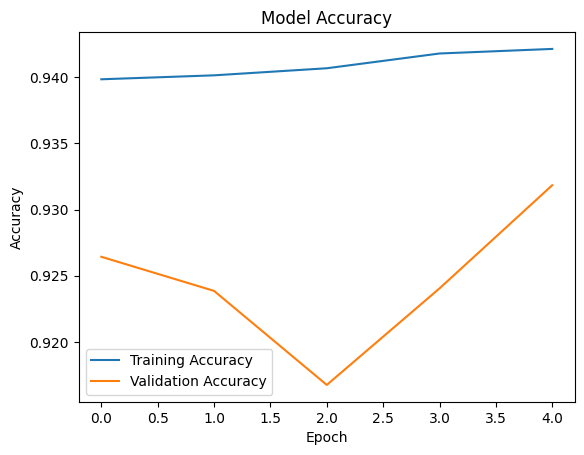

In [14]:

# Fit the model and store the history
history = model.fit_generator(train_data, steps_per_epoch=train_data.samples//batchsize,
                              validation_data=validation_data,
                              validation_steps=validation_data.samples//batchsize,
                              callbacks=callbacks,
                              epochs=5)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
